In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

## Process raw data

This example demonstrates how to load and process a large data file (8 GB). This file is too large to load into memory at once (on most PCs), so memory mapping is used to only load the part of the data. A small volume and a single slice are extracted and saved for use in the other examples.

In [2]:
import numpy as np
from nanomesh import Volume

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Load the data using a `np.memmap` to prevent the entire data set to be loaded into memory at once.

In [3]:
data_name = 'G:\escience\hpgem\PG_EBAR_18072017_CH_6C_s15_10nm_rec_sa7_1024_1024_2048.vol'
# data_name = '/mnt/g/escience/hpgem/PG_EBAR_18072017_CH_6C_s15_10nm_rec_sa7_1024_1024_2048.vol'

vol = Volume.load(data_name, mmap_mode='r')
vol

Volume(shape=(2048, 1024, 1024))

The `show_slice` method is still quite responsive to look at sections of the data. `show_volume` also works, but loads the entire volume into memory, which may make everything a bit slow and unresponsive 😅

<IPython.core.display.Javascript object>


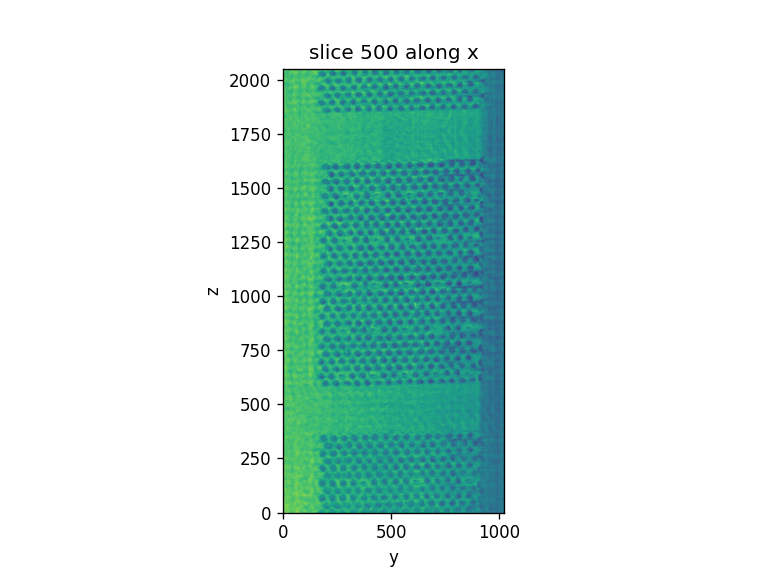

interactive(children=(IntSlider(value=500, description='index', max=1023), RadioButtons(description='along', o…

In [4]:
vol.show_slice(index=500)

It's easier to work with a section of the data. Note that a `np.memmap` object can be sliced like a normal `numpy` array, so we can extract a subvolume to work with:

<IPython.core.display.Javascript object>


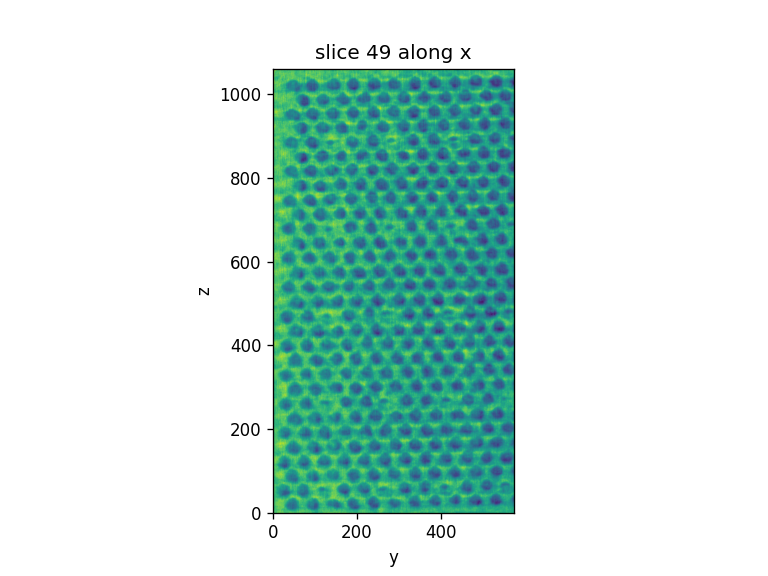

interactive(children=(IntSlider(value=49, description='index', max=99), RadioButtons(description='along', opti…

In [5]:
cropped = vol.select_subvolume(xs=(450, 550), ys=(150, 725), zs=(410,1470))
cropped.show_slice()

Display the cropped data.

In [6]:
cropped.show()

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

Save the data to numpy binary format.

In [7]:
cropped.save('slab_x450-550.npy')

Select a slice from the data and trim the edges for further analyses

<IPython.core.display.Javascript object>


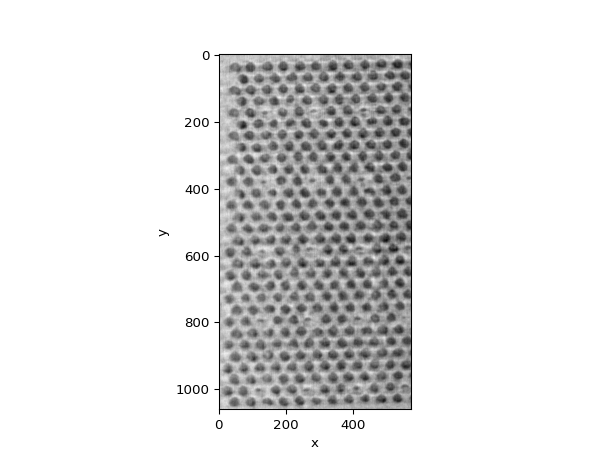

<AxesSubplot:xlabel='x', ylabel='y'>

In [8]:
plane = vol.select_plane(x=500)
plane = plane.crop(left=150, right=725, top=410, bottom=1470)
plane.show()

And save it...

In [9]:
plane.save('x500')